### Inputs and Imports

In [2]:
input_file_list = []
sample_input_file_list = []

day = '15'

with open(f'Inputs\\day_{day}.txt', 'r') as input_file: 
    for line in input_file.readlines():
        input_file_list.append(line.rstrip('\n'))
with open(f'C:Inputs\\day_{day}_sample.txt', 'r') as input_file: 
    for line in input_file.readlines():
        sample_input_file_list.append(line.rstrip('\n'))        

########################        
# Part One Sample Answer:
########################
# Part Two Sample Answer:
########################

### Part One

In [45]:
def display(self, position):
        '''Displays a number on that tile'''
        font = pygame.font.SysFont('arial', 50)
        text = font.render(str(self.value), True, (0, 0, 0))
        self.window.blit(text, position)
        pygame.display.update()
        
display(self, position)        

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

raw_input = input_file_list
raw_input = sample_input_file_list

def create_grid(raw_input):
    grid = []
    for i in raw_input:
        new_row = []
        for j in i:
            new_row.append(int(j))
        grid.append(new_row)    
    return grid

def get_heuristic(next_pos, end_pos, risk_level):
    x1, y1 = next_pos
    x2, y2 = end_pos
    return (abs(x1 - x2) + abs(y1 - y2)) + risk_level

def create_grid_dict(raw_input: list) -> '{dict:{dict}':
    '''
    Input: 
        - A list of strings
        - Where each string is a list of risk indexes from 1-9 to form a 2d grid, 
        - eg: the following is a 3x3 grid with risks levels from 1 at coord (0,0) and 7 at (2,2)
        ['198',
         '458',
         '167']
    Output:
        - A Dictionary with the coordinate (as a tuple) as the key
        - A sub dictionary as the value with the following keys:
            - risk_level - the int from 1-
    '''
    grid_dict = {}
    for y_idx, y in enumerate(grid):
        for x_idx, x in enumerate(y):
            risk_level = (grid[y_idx][x_idx])
            node = (x_idx,y_idx)
            grid_dict[node] = {'risk_level' : int(risk_level),
                               'f_score'    : float("inf"),
                               'g_score'    : float("inf"),
                               'h_score'    : float("inf"),
                               'parent_node': '' }
    return grid_dict

def get_heuristic(next_pos, end_pos, risk_level):
    x1, y1 = next_pos
    x2, y2 = end_pos
    return (abs(x1 - x2) + abs(y1 - y2)) + risk_level

def get_end_position(grid):
    '''
    takes a 2d array (in the format of a list of lists)
    and outputs the coordinates for the bottom right of the grid in (x,y)
    '''
    end = (len(grid[1])-1, len(grid)-1) # (x,y) of the bottom right node
    return end

# create_grid(raw_input)
grid_dict = create_grid_dict(raw_input)
# grid_dict


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from queue import PriorityQueue

raw_input = input_file_list
raw_input = sample_input_file_list

def create_grid(raw_input):
    grid = []
    for i in raw_input:
        new_row = []
        for j in i:
            new_row.append(int(j))
        grid.append(new_row)    
    return grid

def get_heuristic(next_node, end_node):
    x1, y1 = next_node
    x2, y2 = end_node
    return (abs(x1 - x2) + abs(y1 - y2))

def get_end_position(grid):
    '''
    takes a 2d array (in the format of a list of lists)
    and outputs the coordinates for the bottom right of the grid in (x,y)
    '''
    end = (len(grid[1])-1, len(grid)-1) # (x,y) of the bottom right node
    return end

# def get_neighbours(current_node, end_node, grid, open_list, closed_list):
#     # get add valid neighbours to open list
#     neighbours = [] 
#     for neighbour in [(0, 1), (1, 0), (-1, 0), (0, -1)]:
#         potential_neighbour = (current_node[0] + neighbour[0], current_node[1] + neighbour[1])
#         # checking that the neighbour is within the grid
#         valid_neighbour = 0 <= potential_neighbour[0] <= end_node[0] 
#             and 0 <= potential_neighbour[1] <= end_node[1]
#             and potential_neighbour not in closed_list
#         if  valid_neighbour:        
#             neighbours.append(potential_neighbour)
            
#     return neighbours


def create_node_dict(node, parent, end_node, grid):
    
    current_risk = grid[node[1]][node[0]]
    g_score = parent[g_score] + current_risk
    h_score = get_heuristic(node, end_node)
    f_score = g_score + h_score 
    
    node_dict = {}
    node_dict[node] = {'f_score'    : f_score,
                       'g_score'    : g_score,
                       'h_score'    : h_score,
                       'parent_node': parent }
    return node_dict

grid = create_grid(raw_input)

start_node = (0,0)
start_node_risk = grid[start_node[1]][start_node[0]]
end_node = get_end_position(grid)

node_dict = {}
node_dict[start_node] = {'f_score'    : int(start_node_risk) + get_heuristic(start_node, end_node),
                         'g_score'    : int(start_node_risk),
                         'h_score'    : get_heuristic(start_node, end_node),
                         'parent_node': None }

open_list   = PriorityQueue()
closed_list = []

open_list.put((1, start_node))

counter = 0

# from here will turn into a while loop but just doing the single step to start
while not open_list.empty():
    if counter > 1:
        break
    
    # pulls the lowest f_score from the open list 
    current_node_and_priority = open_list.get()
    
    print(current_node_and_priority)
    print(type(current_node_and_priority))
    for idx, i in enumerate(current_node_and_priority):
        print(idx, i, sep = '-')
    
    current_node = current_node_and_priority[1]
    
    # is current node target
    if current_node == end_node:
        break
        
    # get add valid neighbours to open list
    neighbours = [] 
    for neighbour in [(0, 1), (1, 0), (-1, 0), (0, -1)]:
        potential_neighbour = (current_node[0] + neighbour[0], current_node[1] + neighbour[1])
        # checking that the neighbour is within the grid
        valid_neighbour = (0 <= potential_neighbour[0] <= end_node[0] and \
                           0 <= potential_neighbour[1] <= end_node[1] and \
                           potential_neighbour not in closed_list)
        if  valid_neighbour:        
            neighbours.append(potential_neighbour)
            
        # if the neighbour is in the open list then replace if this has a lower f_score
    
    for neighbour in neighbours:
        open_list.put(1, neighbour)
        
          

    
   
        
    counter += 1
    


(1, (0, 0))
<class 'tuple'>
0-1
1-(0, 0)
1
<class 'int'>


TypeError: 'int' object is not iterable

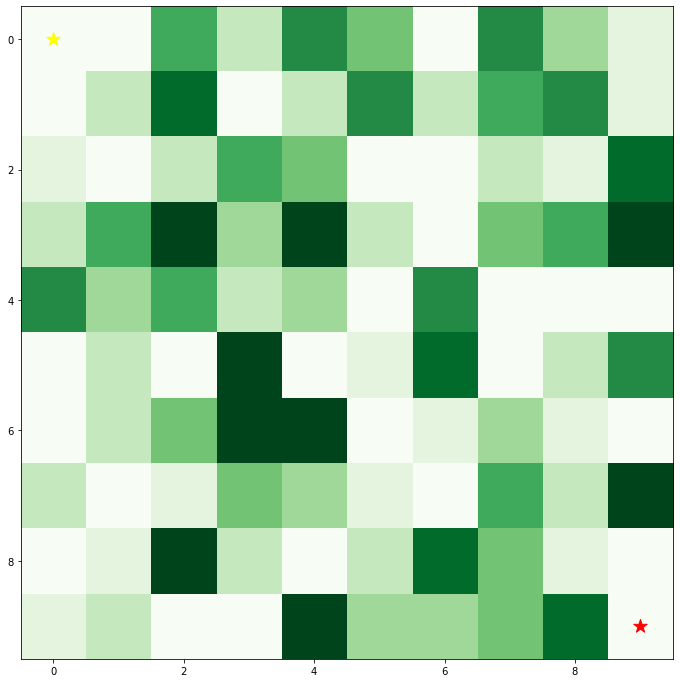

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# raw_input = input_file_list
raw_input = sample_input_file_list

grid = create_grid(raw_input)
grid = np.array(grid)

# plot map and path
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap='Greens') # setting colour scheme
ax.scatter(start[1],start[0], marker = "*", color = "yellow", s = 200)
ax.scatter(end[1],end[0], marker = "*", color = "red", s = 200)

plt.show()

### Part Two

In [29]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
#         for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares inc diagonal
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]: # Adjacent squares    

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            node_risk = maze[node_position[0]][node_position[1]]
            
#             # Make sure walkable terrain
#             if maze[node_position[0]][node_position[1]] != 0:
#                 continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue
            print(node_risk, child.g, child.h, child.f)
            
            
            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = node_risk + (((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2))
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)

def create_grid(raw_input):
    
    grid = []
    
    for i in raw_input:
        new_row = []
        for j in i:
            new_row.append(int(j))
        grid.append(new_row) 
        
#     grid = np.array(grid)
    return grid

def main():

#     maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
    
    maze = [[1, 5, 1],
            [1, 9, 1],
            [1, 1, 1]]
    
#     maze = [[0, 5, 1],
#             [0, 9, 1],
#             [0, 0, 0]]
        
#     maze = create_grid(raw_input)
    
    print(maze)
    
    start = (0,0)
    end = (len(maze[1])-1, len(maze)-1) # (x,y) of the bottom right node

    path = astar(maze, start, end)
    print(path)

if __name__ == '__main__':
    main()

[[1, 5, 1], [1, 9, 1], [1, 1, 1]]
1 0 0 0
1 0 0 0
9 0 0 0
9 0 0 0
9 0 0 0
1 0 0 0
1 0 0 0
1 0 0 0
1 0 0 0
1 0 0 0
1 0 0 0
1 0 0 0
1 0 0 0
1 0 0 0
1 0 0 0
9 0 0 0
9 0 0 0
9 0 0 0
[(0, 0), (1, 0), (1, 1), (1, 2), (2, 2)]


In [63]:
import numpy as np

# raw_input = input_file_list
raw_input = sample_input_file_list

def create_grid_array(raw_input):
    grid = []
    for i in raw_input:
        new_row = []
        for j in i:
            new_row.append(int(j))
        grid.append(new_row)    
    return grid

def create_grid_dict(raw_input: list) -> '{dict:{dict}':
    '''
    Input: 
        - A list of strings
        - Where each string is a list of risk indexes from 1-9 to form a 2d grid, 
        - eg: the following is a 3x3 grid with risks levels from 1 at coord (0,0) and 7 at (2,2)
        ['198',
         '458',
         '167']
    Output:
        - A Dictionary with the coordinate (as a tuple) as the key
        - A sub dictionary as the value with the following keys:
            - risk_level - the int from 1-
    '''
    grid_dict = {}
    for y_idx, y in enumerate(grid):
        for x_idx, x in enumerate(y):
            risk_level = (grid[y_idx][x_idx])
            node = (x_idx,y_idx)
            grid_dict[node] = {'risk_level' : int(risk_level),
                               'f_score'    : float("inf"),
                               'g_score'    : float("inf"),
                               'h_score'    : float("inf")}
    


# raw_input = input_file_list       
raw_input = sample_input_file_list


raw_input

['1163751742',
 '1381373672',
 '2136511328',
 '3694931569',
 '7463417111',
 '1319128137',
 '1359912421',
 '3125421639',
 '1293138521',
 '2311944581']